In [164]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# PLOT FUNCTION

In [165]:
#function
x = np.linspace(-10,10,100)
y = (x - 1)**4 + x**2

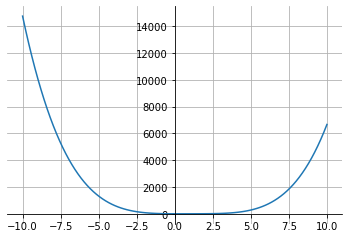

In [166]:
#plot the function
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.grid()
plt.plot(x,y)
plt.show()

# BISECTION METHOD

In [167]:
#bisection method
def find_root_bisection(y,a,b):
    range = 0.00001
    a = 0
    b = 4
    while (abs(a-b)>range):
        m = (a+b)/2
        y_a = y(a)
        y_b = y(b)
        y_m = y(m)
        if np.sign(y_m)!= np.sign(y_a):
            b = m
        else :a = m
    return m,y(m)

In [168]:
#test bisection method
y = lambda x:x**2 -3 
find_root_bisection(y,0,4)

(1.7320480346679688, -9.605602826923132e-06)

# Newton-Raphson method

In [169]:
# NR method
def newton_raphson(f_x,der_f_x,x_0):
    h = f_x(x_0)/der_f_x(x_0)
    x = x_0
    while abs(h) >= 0.001:
        h = f_x(x)/der_f_x(x)
        x = x - h
#         print(h)
    return x,f_x(x)
    

In [170]:
#test NR method
y = lambda x:x**2 -3
der_y = lambda x:2*x
x_0 = 1
newton_raphson(y,der_y,x_0)

(1.7320508100147276, 8.47267411785424e-09)

# USE FOR DERIVATIVE OF FUNCTION

In [171]:
der_f_x = lambda x:4*(x-1)**3 + 2*x
find_root_bisection(der_f_x,-10,10)

(0.41024017333984375, -3.280958699214409e-05)

x_min: 0.41, f(x_min): 0.29


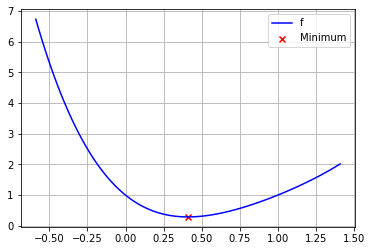

In [172]:
f = lambda x : (x - 1)**4 + x**2

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

res = minimize_scalar(f, method='brent')
print('x_min: %.02f, f(x_min): %.02f' % (res.x, res.fun))

# plot curve
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# plot optima
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

plt.grid()
plt.legend(loc = 1)

# GRADIENT DESCENT METHOD

If learning rate is too big, gradient descent can overstep the minimum value

If learning rate is too small, gradient descent can be too slow

In [173]:
# gradient descent
def gradient_descent(f,f_prime,start,learning_rate):
    x_0 = start
    x_1 = x_0 - learning_rate*f_prime(x_0)
    precision = 0.0001
    iter = 0
    while abs(x_1 - x_0) >= precision:
        x_0 = x_1
        x_1 = x_0 - learning_rate*f_prime(x_0)
    return x_1

In [174]:
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print("xmin: %0.2f, f(x_min): %0.2f" % (x_min, f_min))

xmin: 0.41, f(x_min): 0.29


# SIMPLEX ALGORITHM

In [175]:
#Simplex method in Optimization
def solve_linear_problem(A, b, c):
    from scipy.optimize import linprog
    x0_bounds = (0, None)
    x1_bounds = (0, None)
    res = linprog(c, A_ub=A, b_ub=b,  bounds=(x0_bounds, x1_bounds), method='simplex', options={"disp": True})
    return res.fun,res.x

In [176]:
import numpy as np
# maximize   z = x + 2y
# subject to
#       • 2x + y ≤ 10
#       • -4x + 5y ≤ 8
#       • x - 2y ≤ 3
#       • x, y ≥ 0
c = np.array([-1,-2])
A = np.array([[2,1],[-4,5],[1,-2]])
b = np.array([10,8,3])

optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print("The optimal value is: ", optimal_value, " and is reached for x = ", optimal_arg)

Optimization terminated successfully.
         Current function value: -11.000000  
         Iterations: 3
The optimal value is:  -11.0  and is reached for x =  [3. 4.]


Is the solution you found located on the edge of the polytope? Why?

Yes.
The Simplex method is a search procedure that sifts through the set of basic feasible solutions, one at a time, until the optimal basic feasible solution (whenever it exists) is identified.
It will begin the search at (any) one of the corner points and then move toward the optimal corner point along the edges of the feasible region.